In [1]:
import glob
import netCDF4
import xarray 
import numpy as np
import datetime as dt
import pandas as pd
from pandas import DataFrame
from math import *

import os
import csv
import numpy as np                  # For doing math
import matplotlib.pyplot as plt     # For plotting
import matplotlib.dates as mdates   # For formatting dates when plotting
import matplotlib.colors as colors  # For truncating colorbars
import matplotlib.style as style
import xarray as xr                 # For dealing with netCDF data
import pandas as pd                 # A quick way to deal with time stamps
import cartopy.crs as ccrs

In [2]:
file   = 'MERRA2_300.inst3_3d_asm_Np.20090109.nc4'
ds=xr.open_dataset(file)

In [ ]:
ds

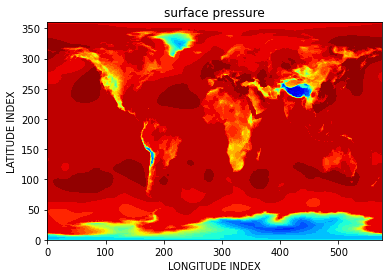

In [3]:
#surface pressure map
plt.figure(1)
plt.contourf(ds.PS[0,:,:],30,cmap='jet')
plt.xlabel('LONGITUDE INDEX')
plt.ylabel('LATITUDE INDEX')
plt.title('surface pressure')

plt.show()

In [4]:
boulder=ds.sel(time='2009-01-09T18:00:00', lon=-105.7,lat=40,method='nearest')
height= -np.log(boulder.lev*0.001)*8.
wind_speed=np.sqrt(np.power(boulder.U,2) + np.power(boulder.V,2))
north_pole=ds.sel(time='2009-01-09T18:00:00', lon=-105.7,lat=90,method='nearest')
wind_speedNP=np.sqrt(np.power(north_pole.U,2) + np.power(north_pole.V,2))

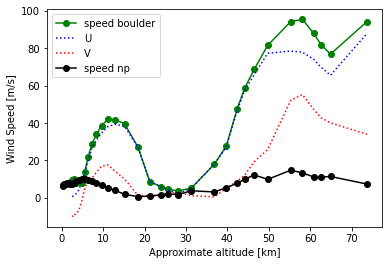

In [5]:
#wind speed in boulder and the north pole
plt.plot(height,wind_speed,'go-', label='speed boulder')
plt.plot(height,boulder.U,'b:', label='U')
plt.plot(height,boulder.V,'r:',label='V')
plt.plot(height,wind_speedNP,'ko-', label='speed np')
plt.xlabel('Approximate altitude [km]')
plt.ylabel('Wind Speed [m/s]')
plt.legend()
plt.show()

In [ ]:
boulder

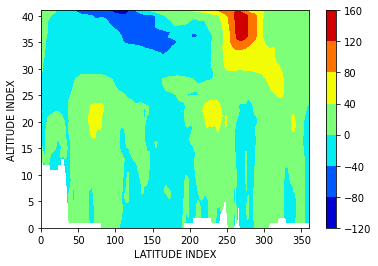

In [6]:
#wind speed from south to north pole along longitude 0
plt.contourf(ds.U.sel(time='2009-01-09T18:00:00',lon=0,method='nearest'),cmap='jet')
plt.xlabel('LATITUDE INDEX')
plt.ylabel('ALTITUDE INDEX')
plt.colorbar()

plt.show()

In [ ]:
#testing wind barbs
plt.barbs(boulder.U,boulder.V)

In [7]:
test=ds.sel(time='2009-01-09T00:00:00', lon=slice(-160,-145),lat=slice(55,90),lev=5)


xx, yy = np.meshgrid(test.lon,test.lat)
magnitude = (test.U ** 2 + test.V ** 2) ** 0.5

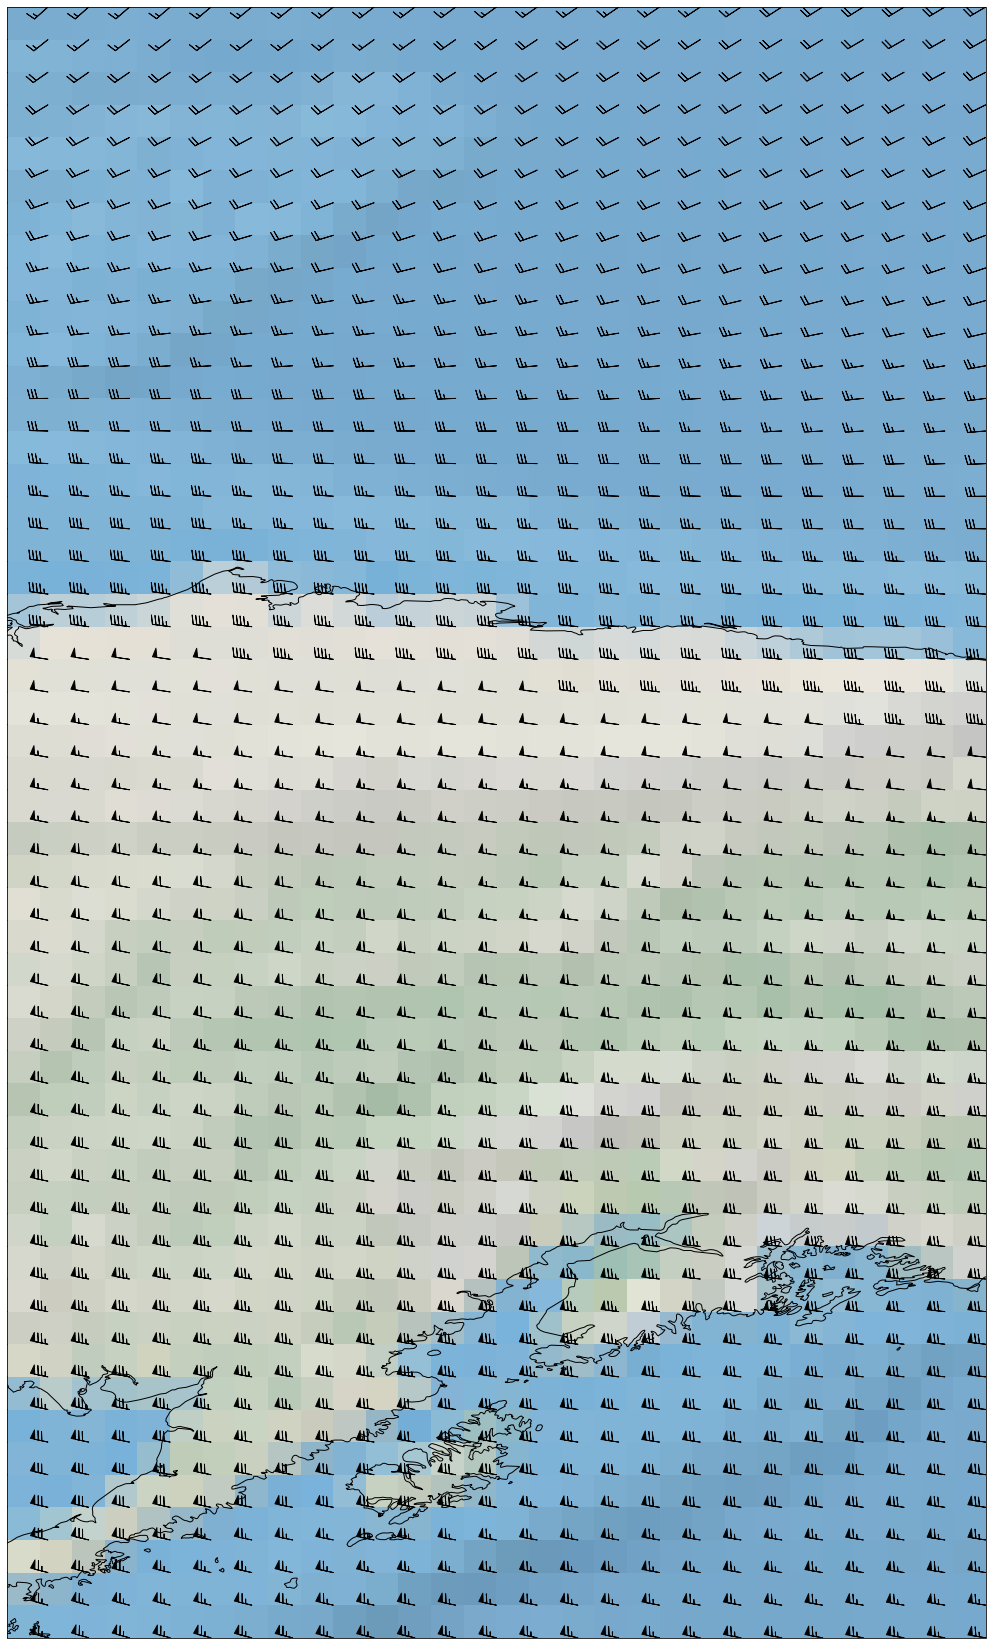

In [8]:
#wind barbs in Alaska at level 5
fig = plt.figure(figsize=(20, 30))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-160, -145, 55, 80], crs=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
ax.barbs(xx,yy,test.U,test.V, length=6,
             sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
            linewidth=0.95, transform=ccrs.PlateCarree())
#ax.streamplot(xx,yy,test.U.to_array(),test.V.to_array(),transform=ccrs.PlateCarree(),linewidth=2, density=2, color=magnitude)
plt.show()
